# Importing necessary libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

# Imorting gdb and tuberclosis data

In [53]:
gdp = pd.read_csv("./API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5607100.csv")
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,NaN


In [54]:
tb = pd.read_csv("./TB_burden_countries_2023-07-20.csv")
tb.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,19542982,190.0,122.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,36.0,19.0,13.0,30.0
1,Afghanistan,AF,AFG,4,EMR,2001,19688632,189.0,122.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,27.0,19.0,42.0
2,Afghanistan,AF,AFG,4,EMR,2002,21000256,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,35.0,24.0,54.0
3,Afghanistan,AF,AFG,4,EMR,2003,22645130,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,32.0,23.0,50.0
4,Afghanistan,AF,AFG,4,EMR,2004,23553551,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,78.0,41.0,29.0,64.0


# Filtering required Fields of only year 2021 to find the latest status of percapita with infectant

In [55]:
gdpFiltered = gdp[["Country Name","Country Code","2021"]]
gdpFiltered.head()

,Country Name,Country Code,2021
0,Aruba,ABW,29342.100730
1,Africa Eastern and Southern,AFE,1539.165543
2,Afghanistan,AFG,363.674087
3,Africa Western and Central,AFW,1765.965307
4,Angola,AGO,1903.717405


In [56]:
tbFiltered = tb[["iso3","e_inc_100k","year"]]
tbFiltered.head(100)

,iso3,e_inc_100k,year
0,AFG,190.0,2000
1,AFG,189.0,2001
2,AFG,189.0,2002
3,AFG,189.0,2003
4,AFG,189.0,2004
...,...,...,...
95,AND,7.4,2007
96,AND,6.0,2008
97,AND,12.0,2009
98,AND,11.0,2010


In [57]:
tbFilteredYear = tbFiltered.loc[tbFiltered['year']==2021].reset_index()
tbFilteredYear.head()

,index,iso3,e_inc_100k,year
0,21,AFG,189.0,2021
1,43,ALB,17.0,2021
2,65,DZA,54.0,2021
3,87,ASM,4.1,2021
4,109,AND,2.9,2021


In [58]:
joinedData = gdpFiltered.merge(tbFilteredYear,left_on="Country Code",right_on="iso3").dropna()
joinedData.head()

,Country Name,Country Code,2021,index,iso3,e_inc_100k,year
0,Aruba,ABW,29342.100730,241,ABW,6.5,2021
1,Afghanistan,AFG,363.674087,21,AFG,189.0,2021
2,Angola,AGO,1903.717405,131,AGO,325.0,2021
3,Albania,ALB,6377.203096,43,ALB,17.0,2021
4,Andorra,AND,42072.341103,109,AND,2.9,2021


In [59]:
joinedDataFiltered = joinedData.drop(['year'],axis = 1)
joinedDataFiltered.head()
joinedDataFiltered.sort_values('2021').reset_index()

,level_0,Country Name,Country Code,2021,index,iso3,e_inc_100k
0,13,Burundi,BDI,221.157803,725,BDI,100.0
1,1,Afghanistan,AFG,363.674087,21,AFG,189.0
2,169,Somalia,SOM,446.981560,3922,SOM,250.0
3,31,Central African Republic,CAF,461.137511,857,CAF,540.0
4,128,Mozambique,MOZ,491.839075,2844,MOZ,361.0
...,...,...,...,...,...,...,...
196,33,Switzerland,CHE,91991.600458,4087,CHE,4.7
197,86,Ireland,IRL,100172.079253,2079,IRL,4.8
198,24,Bermuda,BMU,111774.669092,505,BMU,3.6
199,111,Luxembourg,LUX,133590.146976,2475,LUX,6.1


# Calculating Coefficient of Correlation

In [60]:
per= abs(np.corrcoef(joinedDataFiltered["2021"],y=joinedDataFiltered["e_inc_100k"])[0][1])*100
print(f"Percentage of coeffcient of correlation is {per}")

Percentage of coeffcient of correlation is 35.5220464049883


           2
1.548e-08 x - 0.003793 x + 151.5


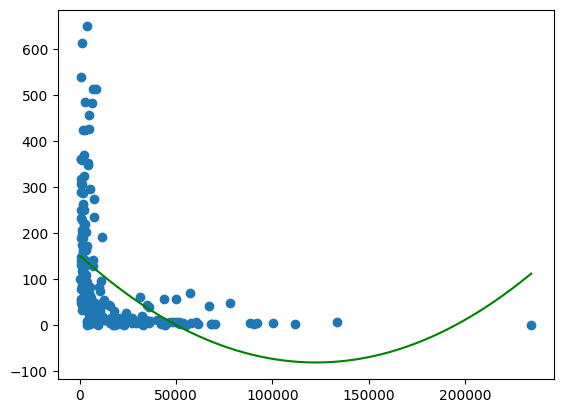

In [61]:
poly = np.poly1d(np.polyfit(joinedDataFiltered["2021"],joinedDataFiltered["e_inc_100k"],2))
print(poly)

x_new = np.arange(min(joinedDataFiltered["2021"]),max(joinedDataFiltered["2021"]))
y_new = poly(x_new)

plt.scatter(joinedDataFiltered["2021"],joinedDataFiltered["e_inc_100k"])
plt.plot(x_new,y_new,'g')

In [62]:
max(joinedDataFiltered["e_inc_100k"])

650.0

In [63]:
countries=  geopandas.read_file(r"./world-administrative-boundaries/world-administrative-boundaries.shp")

In [64]:
countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
1,NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands,"MULTIPOLYGON (((146.68274 43.70777, 146.66664 ..."
2,FRA,Member State,FRA,France,Europe,Western Europe,FR,France,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6..."
3,SRB,Member State,SRB,Serbia,Europe,Southern Europe,RS,Serbie,"POLYGON ((20.26102 46.11485, 20.31403 46.06986..."
4,URY,Member State,URY,Uruguay,Americas,South America,UY,Uruguay,"POLYGON ((-53.37430 -33.74067, -53.39917 -33.7..."


In [67]:
joinedCountriesWData = countries.merge(joinedDataFiltered,left_on="iso3",right_on="iso3").dropna()

Text(0.5, 1.0, 'Tuberculosis per 100k 2021')

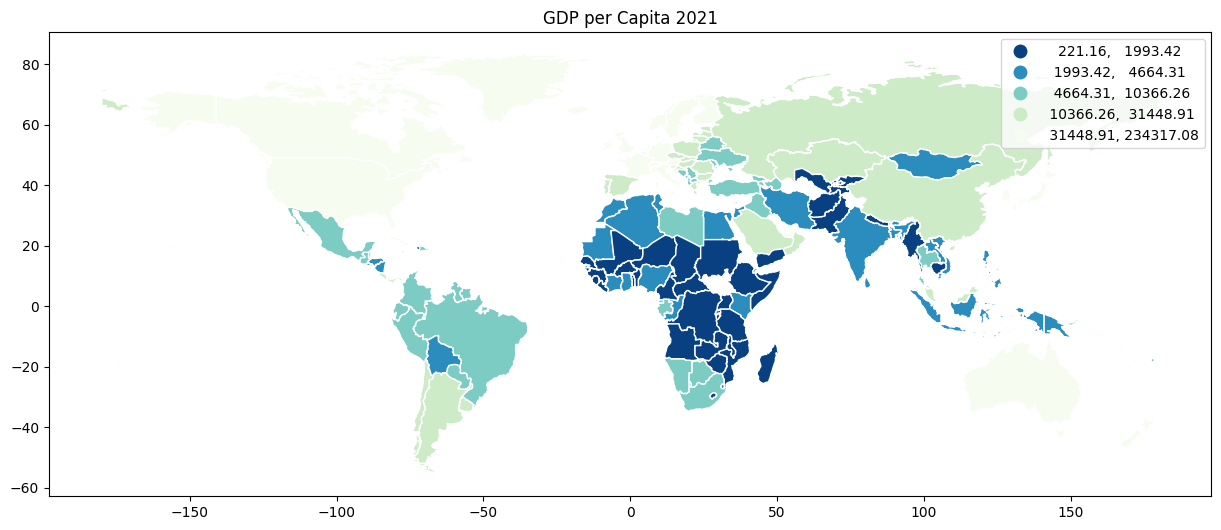

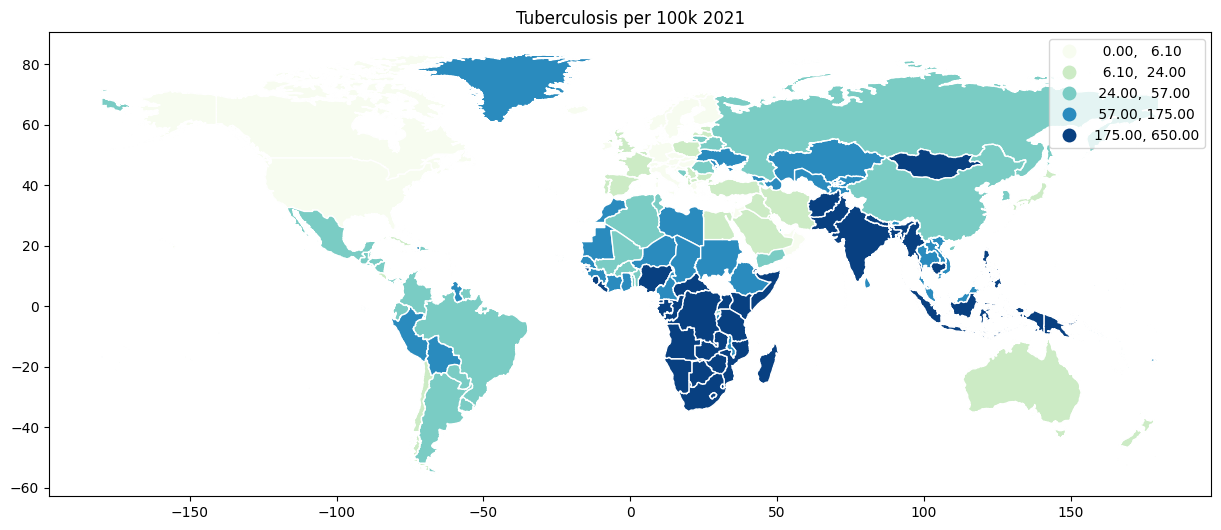

In [118]:
joinedCountriesWData.plot(column="2021",
                          legend=True,
                          cmap='GnBu_r',
                          scheme='quantiles',
                          figsize=(15, 10),
                          edgecolor="white",
                          missing_kwds={
                                "color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"
                          }).set_title("GDP per Capita 2021")

joinedCountriesWData.plot(column="e_inc_100k",
                          legend=True,cmap='GnBu',
                          scheme='quantiles',
                          figsize=(15, 10),
                          edgecolor="white",
                          missing_kwds={
                              "color": "lightgrey",
                              "edgecolor": "red",
                              "hatch": "///",
                              "label": "Missing values",
                          }).set_title("Tuberculosis per 100k 2021")